In [1]:
import os

In [2]:
from png_preprocessing import PNG_Preprocessor
from png_svg_converter import Raster2SVG_Converter

#### All 4 steps below read and write files separately and do not depend on each other. Run help() for function arguments

#### Your working directory should be ./SVG_LogoGenerator/PNG_SVG_Conversion

### Convert single PNG image to SVG

#### Step 1: Increase Quality

###### For single file

In [5]:
new_resolution_image_path = PNG_Preprocessor.increase_image_resolution_path(
    
                                input_image_path  = "./input_png/example_image.png",
                                new_width = False,
                                increase_ratio = 4,
                                write_to_file = True,
                                output_folder = "./new_resolution_png",
                                output_filename = "example_image_width_128"
                                                                            )

###### For all files in folder

In [6]:
PNG_Preprocessor.increase_images_resolution_folder(
                                                    input_images_folder = "./input_png",
                                                    new_width = False,
                                                    increase_ratio = 4,
                                                    output_folder = "./new_resolution_png")

#### Step 2: Reduce number of unique colors 

###### For single file

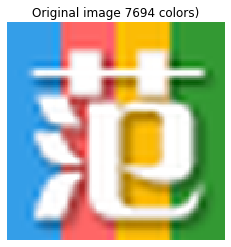

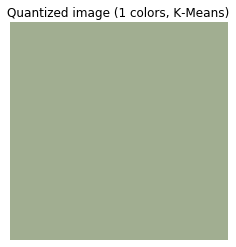

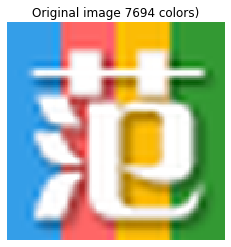

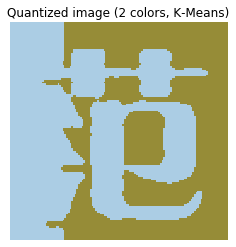

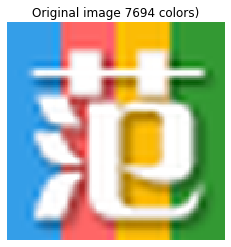

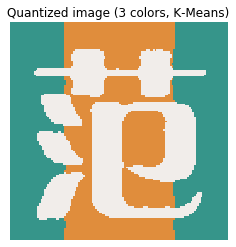

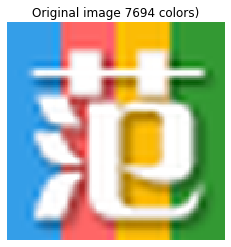

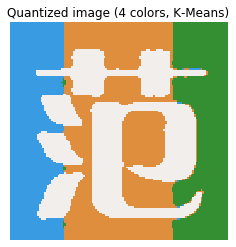

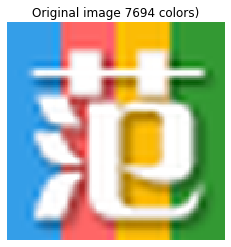

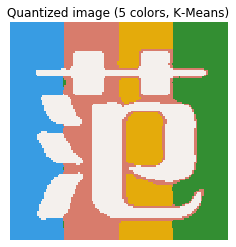

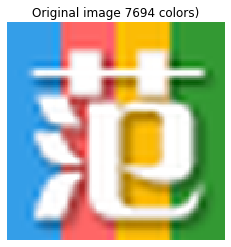

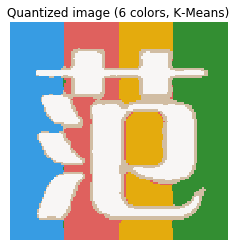

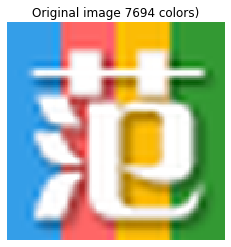

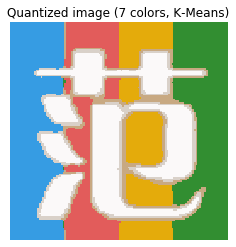

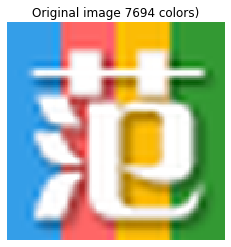

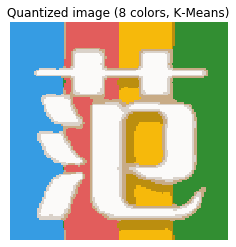

In [6]:
quantized_image = PNG_Preprocessor.quantize_image_from_path(input_image_path  = "./new_resolution_png/example_image_width_128.png",
                                  write_to_file = True,
                                  output_folder = "./colors_reduced_png",
                                  output_filename = "example_image_colors_reduced",
                                  error_threshold = 0.005, 
                                  show_intermediate_results = True)



###### For all files in folder

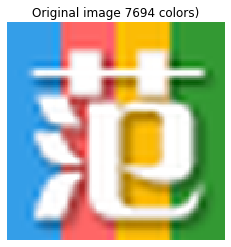

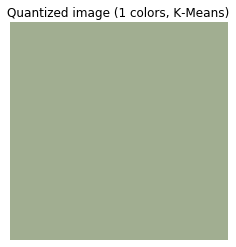

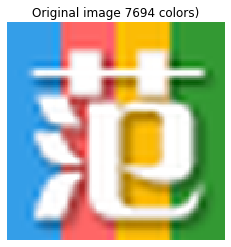

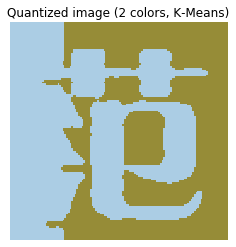

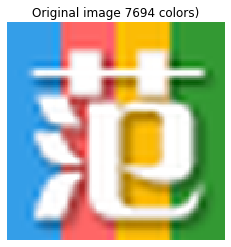

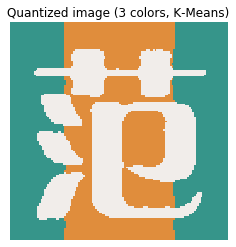

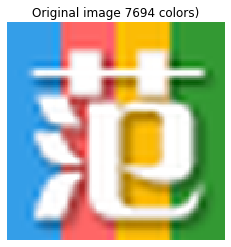

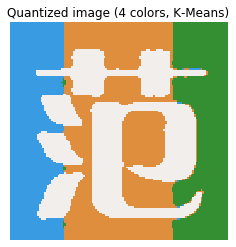

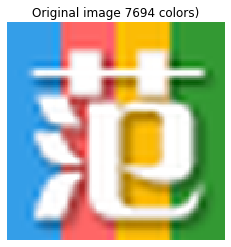

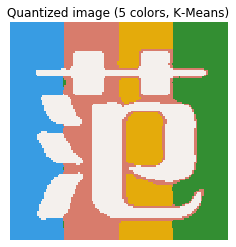

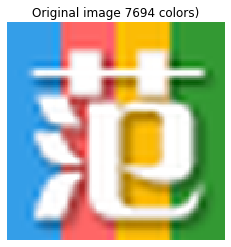

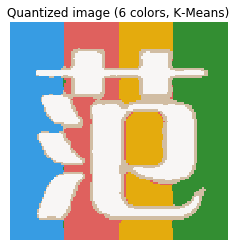

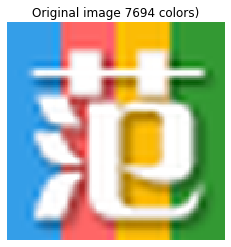

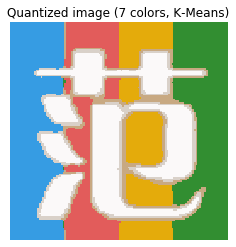

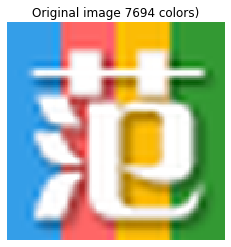

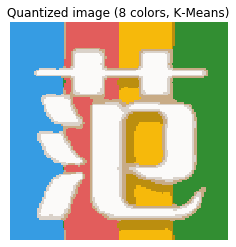

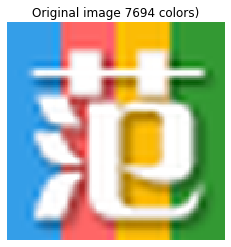

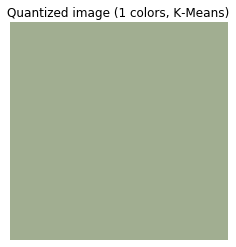

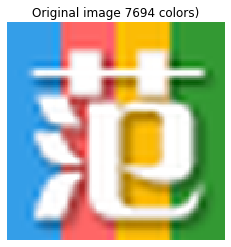

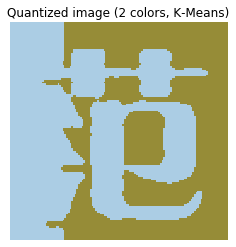

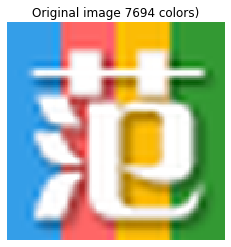

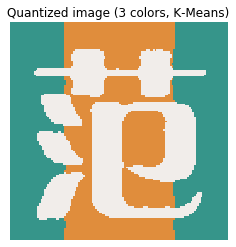

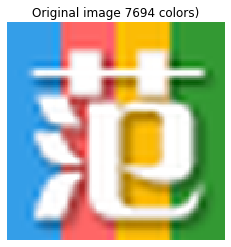

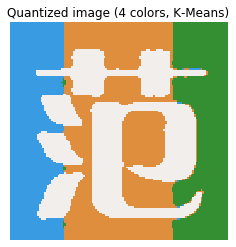

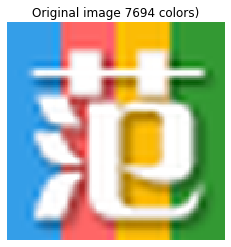

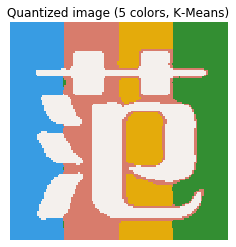

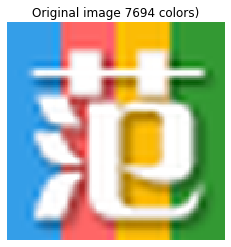

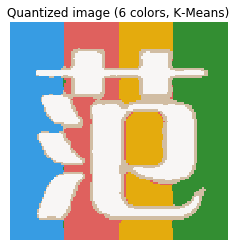

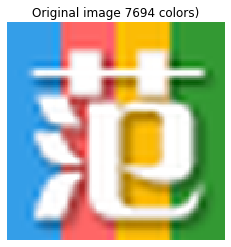

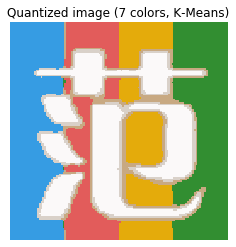

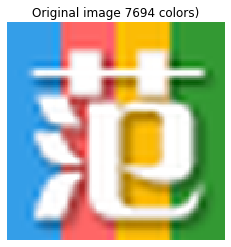

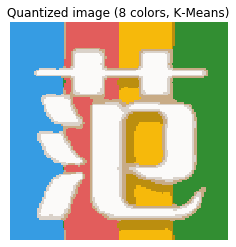

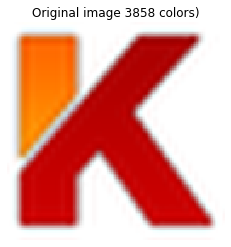

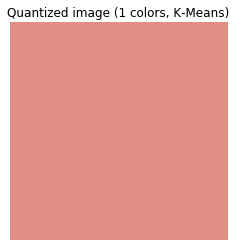

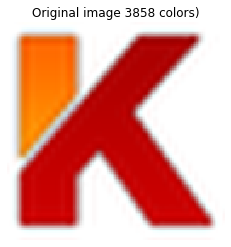

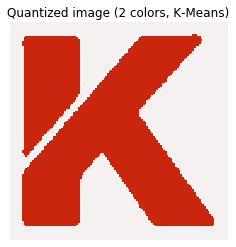

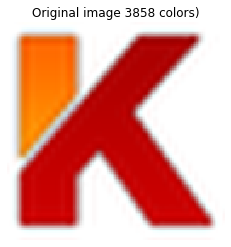

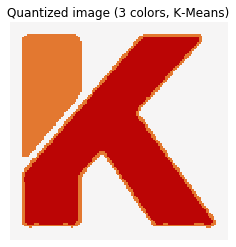

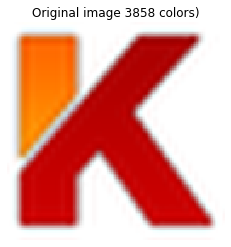

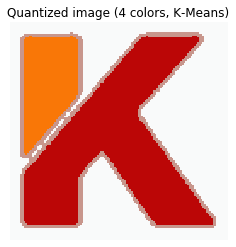

In [7]:
PNG_Preprocessor.quantize_image_from_folder(input_images_folder  = "./new_resolution_png",
                                  output_folder = "./colors_reduced_png",
                                  error_threshold = 0.005, 
                                  show_intermediate_results = True)

#### Step 3: Convert PNG to SVG

#### Initiate converter with the your local path where the "Vtracer" library is stored : "YOUR/PATH/.cargo/bin/vtracer"

In [8]:
converter = Raster2SVG_Converter("/Users/samailguliyev/.cargo/bin/vtracer")

##### Convert single file

In [9]:
converter.convert_raster2svg (                              
# your full local input file path    
    input_image_path = "/Users/samailguliyev/SVG_LogoGenerator/PNG_SVG_Conversion/colors_reduced_png/example_image_colors_reduced.png",

# your full local output folder    

    output_folder = "/Users/samailguliyev/SVG_LogoGenerator/PNG_SVG_Conversion/converted_svg",
    
# filename without .svg extension
    
    output_filename = "converted_image"


                                )

['/Users/samailguliyev/.cargo/bin/vtracer', '--input', '/Users/samailguliyev/SVG_LogoGenerator/PNG_SVG_Conversion/colors_reduced_png/example_image_colors_reduced.png', '--output', '/Users/samailguliyev/SVG_LogoGenerator/PNG_SVG_Conversion/converted_svg/converted_image.svg']


##### Convert all files in folder

In [10]:
converter.convert_raster2svg_folder( 

# your full local input folder    

input_images_folder = "/Users/samailguliyev/SVG_LogoGenerator/PNG_SVG_Conversion/colors_reduced_png",
    
    
# your full local output folder    


output_folder  = "/Users/samailguliyev/SVG_LogoGenerator/PNG_SVG_Conversion/converted_svg" 
)

['/Users/samailguliyev/.cargo/bin/vtracer', '--input', '/Users/samailguliyev/SVG_LogoGenerator/PNG_SVG_Conversion/colors_reduced_png/example_image_width_128_quantized.png', '--output', '/Users/samailguliyev/SVG_LogoGenerator/PNG_SVG_Conversion/converted_svg/example_image_width_128_quantized.svg']
['/Users/samailguliyev/.cargo/bin/vtracer', '--input', '/Users/samailguliyev/SVG_LogoGenerator/PNG_SVG_Conversion/colors_reduced_png/example_image_2_new_resolution_quantized.png', '--output', '/Users/samailguliyev/SVG_LogoGenerator/PNG_SVG_Conversion/converted_svg/example_image_2_new_resolution_quantized.svg']
['/Users/samailguliyev/.cargo/bin/vtracer', '--input', '/Users/samailguliyev/SVG_LogoGenerator/PNG_SVG_Conversion/colors_reduced_png/.DS_Store', '--output', '/Users/samailguliyev/SVG_LogoGenerator/PNG_SVG_Conversion/converted_svg/.svg']
['/Users/samailguliyev/.cargo/bin/vtracer', '--input', '/Users/samailguliyev/SVG_LogoGenerator/PNG_SVG_Conversion/colors_reduced_png/example_image_colors

#### Step 4: Truncate minor paths in converted SVGs

In [8]:
os.chdir("..")

#### For truncation your working directory should be ./SVG_LogoGenerator

In [12]:
from animate_logos_main_adapted.src.preprocessing.svg_truncation import truncate_svg_path, truncate_svgs_folder

##### Single file

In [13]:
truncated_svg_string = truncate_svg_path("./PNG_SVG_Conversion/converted_svg/converted_image.svg",
                                          output_folder = "./PNG_SVG_Conversion/truncated_custom_folder", 
                                          output_filename = "test_trunc_filename.svg",
                                          threshold = 0.99) 
                                                        # threshold between 0 and 1, the larger threshold is,
                                                        # the more paths it keeps and the less is MSE error 
                                                        # MSE value = 1 - threshold


truncated_svg_string

test_trunc_filename
number of path to truncate: 27 out of 48


'<?xml version="1.0" ?><svg height="128" version="1.1" width="128" xmlns="http://www.w3.org/2000/svg">\n<path d="M0 0 C42.24 0 84.48 0 128 0 C128 42.24 128 84.48 128 128 C85.76 128 43.52 128 0 128 C0 85.76 0 43.52 0 0 Z " fill="#C8AB86" transform="translate(0,0)"/>\n\n<path d="M0 0 C10.56 0 21.12 0 32 0 C32 8.58 32 17.16 32 26 C27.66529779 27.73388089 26.14440479 28.22633906 21.8125 28.0625 C18.2659973 27.86374706 18.2659973 27.86374706 15 29 C15 29.66 15 30.32 15 31 C16.57201172 31.07347656 16.57201172 31.07347656 18.17578125 31.1484375 C19.55471354 31.22348143 20.9336185 31.29902857 22.3125 31.375 C23.34793945 31.42140625 23.34793945 31.42140625 24.40429688 31.46875 C28.06990789 31.68124919 29.87900792 31.91933861 33 34 C32.01 36.97 31.02 39.94 30 43 C28.55625 42.979375 27.1125 42.95875 25.625 42.9375 C22.17771295 42.84827854 22.17771295 42.84827854 19 44 C20.22836439 51.04351948 20.22836439 51.04351948 24 57 C24 57.66 24 58.32 24 59 C26.31 59.66 28.62 60.32 31 61 C31 61.99 31 62.98 

##### All files in folder

In [14]:
truncate_svgs_folder(input_folder = "./PNG_SVG_Conversion/converted_svg",
                    output_folder = "./PNG_SVG_Conversion/truncated_custom_folder",
                    threshold = 0.99)

Could not process .DS_Store
example_image_2_new_resolution_quantized
number of path to truncate: 4 out of 5
example_image_width_128_quantized
number of path to truncate: 27 out of 48
example_image_new_resolution_quantized
number of path to truncate: 27 out of 48
converted_example_image
number of path to truncate: 14 out of 18
example_image_colors_reduced
number of path to truncate: 27 out of 48
converted_image
number of path to truncate: 27 out of 48


In [15]:
help(truncate_svg_path)

Help on function truncate_svg_path in module animate_logos_main_adapted.src.preprocessing.svg_truncation:

truncate_svg_path(logo_path, threshold=0.5, output_folder=False, output_filename=False)
        Truncates minor paths and keeps the largest pathes according to MSE error
        ----------
        logo_path : string
    
            Input image path of a SVG file
    
        output_folder: string 
            If False, writes to ./SVG_LogoGenerator/PNG_SVG_Conversion/truncated_svgs. Otherwise, writes to the specified output_folder
    
        output_filename: string
            If False, writes file as "{input_filename}_truncated.svg". Otherwise, writes filename as specified output_filename
    
        error_threshold : float between 0 and 1
            1 - MSE error. If  error_threshold = 0.99, it means, that the MSE error between the original image and the image 
    with reduced colors is less than 1%
    
    
        Returns
        -------
        Truncated SVG string

